In [2]:
#with open(r'C:\Users\dawns\Desktop\error detection\annotation\GreenFood_1.txt\zhengwu.xmi', 'rb') as f:
    #typesystem = load_typesystem(f)

In [1]:
import os
import zipfile
from cassis import load_typesystem, load_cas_from_xmi

In [2]:
# clean data
def clean_data(directory):
    for text in os.listdir(directory):              # os.listdir(path) 返回path指定的文件夹包含的文件或文件夹的名字的列表。
        text_dir = directory + '/' + text
        # unzip and delete zip data
        for file in os.listdir(text_dir):
            file_name = os.fsdecode(file)
            if file_name.endswith('.zip'):
                file_path = text_dir+'/'+file_name
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(text_dir)
                os.remove(file_path)
        # delete annotations from Yuning
        for file in os.listdir(text_dir):
            file_name = os.fsdecode(file)
            if 'yuningding' in file_name:
                file_path = text_dir + '/' + file_name
                os.remove(file_path)

In [3]:
# load cas
def load_cas(text_directory):
    with open(text_directory+'/TypeSystem.xml', 'rb') as f:
        typesystem = load_typesystem(f)
    with open(text_directory+'/zhengwu.xmi', 'rb') as f:
        cas = load_cas_from_xmi(f, typesystem=typesystem)
    return cas

In [4]:
directory = r'C:\Users\dawns\Desktop\annotation\annotation'
#clean_data(directory)
annotation_cas = []
text = 'GreenFood_10.txt'
text_dir = directory + '/' + text
cas = load_cas(text_dir)

In [5]:
# check all the types
for t in cas.typesystem.get_types():
    print(t)

Type(name=de.tudarmstadt.ukp.dkpro.core.api.transform.type.SofaChangeAnnotation)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.syntax.type.constituent.Constituent)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.SurfaceForm)
Type(name=de.tudarmstadt.ukp.clarin.webanno.api.type.FeatureDefinition)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.coref.type.CoreferenceLink)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.lexmorph.type.morph.Morpheme)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.Div)
Type(name=webanno.custom.Connection)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.metadata.type.TagsetDescription)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.semantics.type.SemanticArgument)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.semantics.type.SemanticField)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.coref.type.CoreferenceChain)
Type(name=org.dkpro.core.api.xml.type.XmlAttribute)
Type(name=de.tudarmstadt.ukp.dkpro.core.api.semantics.type.SemPred)
Type(name=de.tudarms

In [6]:
# Selecting annotations
#error_location=[]
for sentence in cas.select('de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.Sentence'):
    sentence_begin = sentence.begin
    for error in cas.select_covered('webanno.custom.Error', sentence):
        print(error.get_covered_text())
        print(error.begin)
        print(error.end)
       
        #error_location.append((error.begin,error.end,error.get_covered_text()))
#print(error_location)

NameError: name 'error' is not defined

In [ ]:
len(error.get_covered_text())

4

In [ ]:
print(error.get_covered_text())

[B即]


In [6]:
import pandas as pd
import numpy as np
directory = r'C:\Users\dawns\Desktop\annotation\annotation'
df = pd.DataFrame()
filenames=os.listdir(r'C:\Users\dawns\Desktop\annotation\annotation') #遍历只有一层目录的文件
# 当文件中既有文件又有文件夹时–os.walk()   
#print(filenames) 
# 把文件夹代号转为dataframe首列
df['Title']= pd.DataFrame(filenames)
df['Error_Annotation']=df['Title']
df

,Title,Error_Annotation
0,GreenFood_1.txt,GreenFood_1.txt
1,GreenFood_10.txt,GreenFood_10.txt
2,GreenFood_100.txt,GreenFood_100.txt
3,GreenFood_101.txt,GreenFood_101.txt
4,GreenFood_102.txt,GreenFood_102.txt
...,...,...
3626,Multi_995.txt,Multi_995.txt
3627,Multi_996.txt,Multi_996.txt
3628,Multi_997.txt,Multi_997.txt
3629,Multi_998.txt,Multi_998.txt


In [9]:

df1 = pd.DataFrame()
for text in filenames:
    text_dir = directory + '/' + text
    cas = load_cas(text_dir)
    error_location=[]
    for sentence in cas.select('de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.Sentence'):
        sentence_begin = sentence.begin
        for error in cas.select_covered('webanno.custom.Error', sentence):
            #if len(error.get_covered_text())==0:
                #df1= df1.append('0')
            if len(error.get_covered_text())!=0:
                error_location.append((error.begin,error.end,error.get_covered_text()))
            #df1=df1.append(error_location)
                
                #cover.append('0')
            
                #error_location.append((error.begin,error.end,error.get_covered_text()))
        #print(error_location)
                #cover.append(error_location)
                
                     
                #cover.append((error.begin,error.end,error.get_covered_text()))
                #print(cover)


    

In [8]:
without_error=[]
for text in filenames:
    text_dir = directory + '/' + text
    cas = load_cas(text_dir)
    for sentence in cas.select('de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.webanno.custom.Error'):
        if len(error.get_covered_text())==0:
            without_error.append(text)
            print(text)
            


TypeNotFoundError: Type with name [de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.webanno.custom.Error] not found!

In [ ]:
print(without_error)

[]


In [ ]:
with_error=[]
for text in filenames:
    text_dir = directory + '/' + text
    cas = load_cas(text_dir)
    for sentence in cas.select('de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.Sentence'):
        sentence_begin = sentence.begin
        if len(error.get_covered_text())!=0:
            with_error.append(text)
            #print(text)

In [ ]:
print(len(with_error))
print(len(list(set(with_error))))
# 3631 包含错误的吗？不应该啊

55278
3631


In [4]:
directory = r'C:\Users\dawns\Desktop\annotation\annotation'
#clean_data(directory)
annotation_cas = []
text = 'GreenFood_1.txt'
text_dir = directory + '/' + text
cas = load_cas(text_dir)

In [7]:
df1 = pd.DataFrame()

In [9]:
cover=[]
for text in filenames:
    text_dir = directory + '/' + text
    cas = load_cas(text_dir)
    error_location=[]
    for sentence in cas.select('de.tudarmstadt.ukp.dkpro.core.api.segmentation.type.Sentence'):
        sentence_begin = sentence.begin
        for error in cas.select_covered('webanno.custom.Error', sentence):
            cover.append(error.get_covered_text())
            

In [ ]:
#print(cover)

In [12]:
len(cover)

2579

In [13]:
from collections import Counter
error_counts = Counter(cover)

top_twelf = error_counts.most_common(12)
print('The most frequency connective words:',top_twelf)
least_twelf = error_counts.most_common()[:-13:-1]
print('The least frequency connective words:',least_twelf)

The most frequency connective words: [('{CQ就}', 122), ('{CC2而}', 93), ('{CD而}', 73), ('{CC而}', 63), ('{CC也}', 54), ('{CC就}', 38), ('{CJ-zy就}', 38), ('{CQ而}', 35), ('{CQ因}', 33), ('{CQ因为}', 32), ('{CQ和}', 32), ('{CC和}', 30)]
The least frequency connective words: [('{CJ-zy又}', 1), ('{CC行}', 1), ('{CC或许}', 1), ('{CC司以}', 1), ('{CC1而且说}', 1), ('{CC还要}', 1), ('{CC1由于}', 1), ('{CC过然}', 1), ('{CC除非}', 1), ('{CD终于}', 1), ('{CC3首先}', 1), ('{CJ-zy以后就}', 1)]


In [ ]:
len(error_counts)

683

In [14]:
top_twenty = error_counts.most_common(12)
print(top_twelf)

[('{CQ就}', 122), ('{CC2而}', 93), ('{CD而}', 73), ('{CC而}', 63), ('{CC也}', 54), ('{CC就}', 38), ('{CJ-zy就}', 38), ('{CQ而}', 35), ('{CQ因}', 33), ('{CQ因为}', 32), ('{CQ和}', 32), ('{CC和}', 30)]


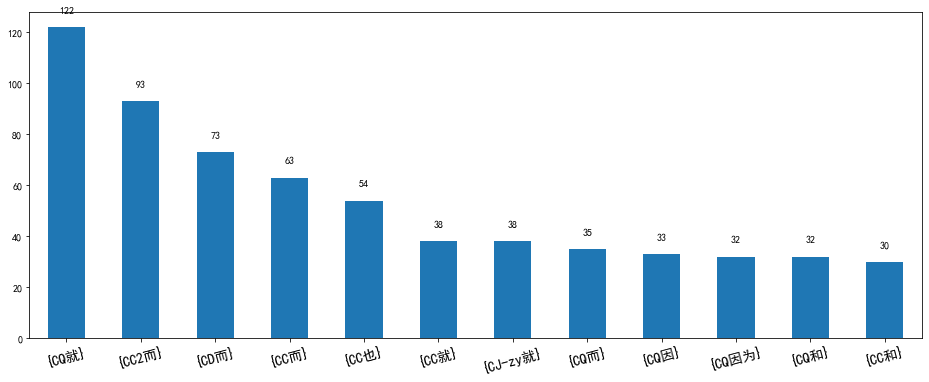

In [15]:
# visualise the most amount of connective words in whole essays
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x_labels = [val[0] for val in top_twenty]
y_labels = [val[1] for val in top_twenty]
plt.figure(figsize=(16,6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels) 
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=15) 
    plt.tick_params(axis='x', labelsize=14) 